In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 7')
import warnings
warnings.filterwarnings('ignore')
#Seaborn has six variations of its default color palette: deep , muted , pastel , bright , dark , and colorblind .


In [5]:
df=pd.read_csv('driver-data.csv')

In [7]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [8]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [9]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
data_analyze=df.drop('id',axis=1)

In [11]:
data_analyze

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [15]:
from sklearn.cluster import KMeans
kmeans_2=KMeans(n_clusters=2)
kmeans_2=kmeans_2.fit(data_analyze)

In [16]:
kmeans_2.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [17]:
kmeans_2.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
len(kmeans_2.labels_)

4000

In [19]:
print(type(kmeans_2.labels_))

<class 'numpy.ndarray'>


In [53]:
unique,counts=np.unique(kmeans_2.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 3200, 1: 800}


array([0, 1])

In [28]:
data_analyze['cluster']=kmeans_2.labels_

In [33]:
data_analyze

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


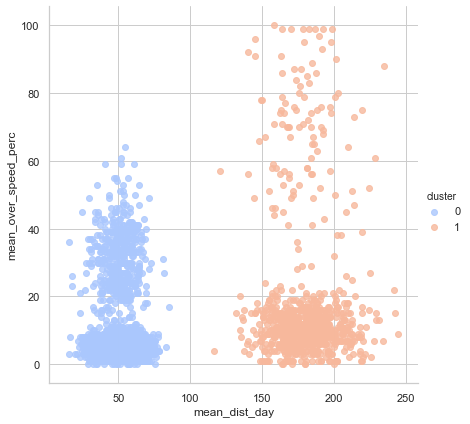

In [43]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',hue='cluster',data=data_analyze,palette='coolwarm',fit_reg=False,size=6)
sns.set_style('whitegrid')

In [44]:
from sklearn.cluster import KMeans
kmeans_4=KMeans(n_clusters=4)
kmeans_4=kmeans_4.fit(data_analyze)

In [45]:
kmeans_4.cluster_centers_

array([[ 4.99842847e+01,  5.21441441e+00,  3.91353616e-15],
       [ 1.80343118e+02,  1.05201149e+01,  1.00000000e+00],
       [ 1.77835096e+02,  7.02884615e+01,  1.00000000e+00],
       [ 5.04612706e+01,  3.24282353e+01, -1.55431223e-15]])

In [46]:
kmeans_4.labels_

array([3, 3, 3, ..., 1, 1, 1])

In [47]:
unique,counts=np.unique(kmeans_4.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 2775, 1: 696, 2: 104, 3: 425}


In [48]:
data_analyze['cluster']=kmeans_4.labels_

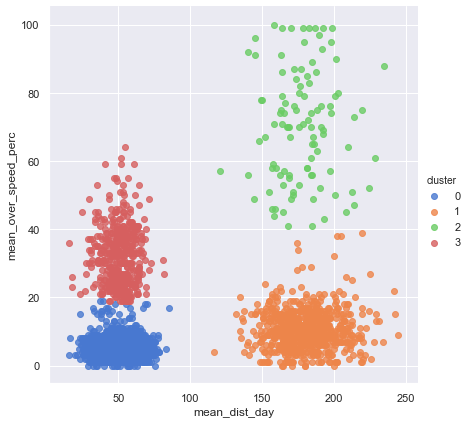

In [50]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',hue='cluster',data=data_analyze,palette='muted',fit_reg=False,size=6,aspect=1)
sns.set_style('darkgrid')